In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from datetime import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

In [208]:
pd.set_option('display.max_columns', None)

In [209]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     955 non-null    object 
 1   Пол                                    954 non-null    object 
 2   Семья                                  955 non-null    object 
 3   Этнос                                  955 non-null    object 
 4   Национальность                         955 non-null    object 
 5   Религия                                955 non-null    object 
 6   Образование                            955 non-null    object 
 7   Профессия                              955 non-null    object 
 8   Вы работаете?                          955 non-null    int64  
 9   Выход на пенсию                        955 non-null    int64  
 10  Прекращение работы по болезни          955 non-null    int64  
 11  Сахарн

In [210]:
df_test = pd.read_csv('test_dataset_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     638 non-null    object 
 1   Пол                                    638 non-null    object 
 2   Семья                                  638 non-null    object 
 3   Этнос                                  638 non-null    object 
 4   Национальность                         638 non-null    object 
 5   Религия                                638 non-null    object 
 6   Образование                            638 non-null    object 
 7   Профессия                              638 non-null    object 
 8   Вы работаете?                          638 non-null    int64  
 9   Выход на пенсию                        638 non-null    int64  
 10  Прекращение работы по болезни          638 non-null    int64  
 11  Сахарн

In [211]:
# Для корректной обработки признаков объединяем тренировочный и тестовый набор данных в один датасет

# выделение целевых значений и датасета
target_train = df_train.iloc[:,-5:]
df_train = df_train.iloc[:,:-5]

# вспомогательный флаг тренировочного и тестовой частей общего набора данных
df_train['train'] = 1
df_test['train'] = 0


# объединение в один датасет
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [212]:
df.head(1)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,train
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,15.0,20.0,0,NaN,употребляю в настоящее время,18.0,22:00:00,06:00:00,0,0,0,54-102-358-02,1


In [213]:
df.columns

Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма',
       'Туберкулез легких ', 'ВИЧ/СПИД',
       'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы',
       'Статус Курения', 'Возраст курения', 'Сигарет в день',
       'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког',
       'Время засыпания', 'Время пробуждения', 'Сон после обеда',
       'Спорт, клубы', 'Религия, клубы', 'ID_y', 'train'],
      dtype='object')

In [214]:
df.columns = ['id', 'sex', 'family', 'ethnos', 'nationality', 'religion', 'education', 'profession',
              'job', 'retired', 'stop_work_due_disease', 'diabetes', 'hepatitis', 'oncology',
              'chronic_lung_disease', 'bronchial_asthma', 'tuberculosis', 'hiv/aids', 'intake_medicines',
              'trauma_last_year', 'fractures', 'smoking', 'smoking_duration', 'ciggaretes_per_day',
              'passive_smoking', 'passive_smoking_frequency', 'alcohol', 'alcohol_duration', 'time_fall_asleep',
              'time_awakening', 'midday_sleep', 'sport_clubs', 'religion_clubs', 'id_y', 'train']

In [215]:
target_train.columns = ['arterial_hypertension', 'ACD',
                        'IHD', 'heart_failure', 'other_cardio_diseases']

In [216]:
df.drop(['id', 'id_y'], axis=1, inplace=True)

In [217]:
# Общее количество пропусков в данных
df.isna().sum()

sex                             1
family                          0
ethnos                          0
nationality                     0
religion                        0
education                       0
profession                      0
job                             0
retired                         0
stop_work_due_disease           0
diabetes                        0
hepatitis                       0
oncology                        0
chronic_lung_disease            0
bronchial_asthma                0
tuberculosis                    0
hiv/aids                        0
intake_medicines                0
trauma_last_year                0
fractures                       0
smoking                         0
smoking_duration              912
ciggaretes_per_day            919
passive_smoking                 0
passive_smoking_frequency    1216
alcohol                         0
alcohol_duration              304
time_fall_asleep                0
time_awakening                  0
midday_sleep  

### Колонка sex

In [218]:
df.sex.value_counts(dropna=False)

Ж      1117
М       475
NaN       1
Name: sex, dtype: int64

In [219]:
# Заполнение пропуска модой (в данном случае - Ж)
df.sex.fillna(df.sex.mode()[0], inplace=True)

In [220]:
df.sex.value_counts(dropna=False)

Ж    1118
М     475
Name: sex, dtype: int64

In [221]:
df.sex = np.where(df.sex == 'Ж', 0, 1)

### Колонка family

In [222]:
df.family.value_counts(dropna=False)

в браке в настоящее время                          937
вдовец / вдова                                     246
в разводе                                          201
гражданский брак / проживание с партнером          129
никогда не был(а) в браке                           77
раздельное проживание (официально не разведены)      3
Name: family, dtype: int64

In [223]:
family = pd.get_dummies(df.family)
print('before replace: ', list(family.columns))
family.columns = ['married', 'divorced', 'widowed','cohabited','single','separated']
print('after replace: ', list(family.columns))

before replace:  ['в браке в настоящее время', 'в разводе', 'вдовец / вдова', 'гражданский брак / проживание с партнером', 'никогда не был(а) в браке', 'раздельное проживание (официально не разведены)']
after replace:  ['married', 'divorced', 'widowed', 'cohabited', 'single', 'separated']


In [224]:
df = pd.concat([df, family], axis=1)
df.drop('family', axis=1, inplace=True)

### Колонка ethnos

In [225]:
df.ethnos.value_counts(dropna=False)

европейская                                                                                                      1559
другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)      24
прочее (любая иная этно-расовая группа, не представленная выше)                                                    10
Name: ethnos, dtype: int64

In [226]:
ethnos = pd.get_dummies(df.ethnos)
print('before replace: ', list(ethnos.columns))
ethnos.columns = ['asian', 'european', 'other']
print('after replace: ', list(ethnos.columns))

before replace:  ['другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)', 'европейская', 'прочее (любая иная этно-расовая группа, не представленная выше)']
after replace:  ['asian', 'european', 'other']


In [227]:
df = pd.concat([df, ethnos], axis=1)

In [228]:
df.drop('ethnos', axis=1, inplace=True)

### Колонка nationality

In [229]:
df.nationality.value_counts(dropna=False)

Русские                  1500
Татары                     33
Немцы                      10
Украинцы                   10
Чуваши                      9
Азербайджанцы               4
Белорусы                    3
Другие национальности       3
Казахи                      3
Армяне                      3
Удмурты                     2
Евреи                       2
Таджики                     2
Киргизы                     2
Мордва                      2
Башкиры                     1
Молдаване                   1
Буряты                      1
Эстонцы                     1
Лезгины                     1
Name: nationality, dtype: int64

In [230]:
# Добавление колонки is_russian, так как количество других национальностей нерепрезентативно
df['is_russian'] = np.where(df['nationality'] == 'Русские', 1, 0)

In [231]:
# Удаление исходной колонки
df.drop('nationality', axis=1, inplace=True)

### Колонка religion

In [232]:
df.religion.value_counts(dropna=False)

Христианство         1361
Атеист / агностик     127
Нет                    73
Ислам                  30
Другое                  1
Индуизм                 1
Name: religion, dtype: int64

In [233]:
religion = pd.get_dummies(df.religion)
print('before replace: ', list(religion.columns))
religion.columns = ['atheist', 'other',
                    'hinduist', 'muslim', 'no', 'christian']
print('after replace: ', list(religion.columns))

before replace:  ['Атеист / агностик', 'Другое', 'Индуизм', 'Ислам', 'Нет', 'Христианство']
after replace:  ['atheist', 'other', 'hinduist', 'muslim', 'no', 'christian']


In [234]:
# Удаление так как в указанных группах всего по 1 представителю (и то, в тестовом датасете)
religion.drop(['other', 'hinduist'], axis=1, inplace=True)

In [235]:
df = pd.concat([df, religion], axis=1)

In [236]:
df.drop('religion', axis=1, inplace=True)

### Колонка education

In [237]:
df.education.value_counts(dropna=False)

4 - профессиональное училище                         757
5 - ВУЗ                                              547
3 - средняя школа / закон.среднее / выше среднего    279
2 - начальная школа                                   10
Name: education, dtype: int64

In [238]:
# Приведение к порядковому признаку
# Единицу можно было не вычитать, так как впоследствии все равно применяется StandardScaler
df.education = df.education.apply(lambda x: int(x[0])-1)

### Колонка profession

In [239]:
df.profession.value_counts(dropna=False)

дипломированные специалисты                                                            382
низкоквалифицированные работники                                                       225
работники,  занятые в сфере обслуживания, торговые работники магазинов и рынков        205
ремесленники и представители других отраслей промышленности                            149
служащие                                                                               142
техники и младшие специалисты                                                          140
ведение домашнего хозяйства                                                            133
операторы и монтажники установок и машинного оборудования                              128
представители   законодат.   органов   власти,  высокопостав. долж.лица и менеджеры     55
квалифицированные работники сельского хозяйства и рыболовного                           25
вооруженные силы                                                                         9

In [240]:
profession = pd.get_dummies(df.profession)
profession.columns

Index(['ведение домашнего хозяйства', 'вооруженные силы',
       'дипломированные специалисты',
       'квалифицированные работники сельского хозяйства и рыболовного',
       'низкоквалифицированные работники',
       'операторы и монтажники установок и машинного оборудования',
       'представители   законодат.   органов   власти,  высокопостав. долж.лица и менеджеры',
       'работники,  занятые в сфере обслуживания, торговые работники магазинов и рынков',
       'ремесленники и представители других отраслей промышленности',
       'служащие', 'техники и младшие специалисты'],
      dtype='object')

In [241]:
profession.columns = ['household','military','senior_specialist','farmer/fisherman','low_qualified_work',
                      'industry','top_management','service','crafters_other', 'office', 'junior_specialists']

In [242]:
df = pd.concat([df, profession], axis=1)
df.drop('profession', axis=1, inplace=True)

### Колонка job

In [243]:
df.job.value_counts(dropna=False)

1    865
0    728
Name: job, dtype: int64

### Колонка retired

In [244]:
df.retired.value_counts(dropna=False)

0    1089
1     504
Name: retired, dtype: int64

### Колонка stop_work_due_disease

In [245]:
df.stop_work_due_disease.value_counts(dropna=False)

0    1509
1      84
Name: stop_work_due_disease, dtype: int64

### Колонка diabetes

In [246]:
df.diabetes.value_counts(dropna=False)

0    1441
1     152
Name: diabetes, dtype: int64

### Колонка hepatitis

In [247]:
df.hepatitis.value_counts(dropna=False)

0    1410
1     183
Name: hepatitis, dtype: int64

### Колонка oncology

In [248]:
df.oncology.value_counts(dropna=False)

0    1521
1      72
Name: oncology, dtype: int64

### Колонка chronic_lung_disease

In [249]:
df.chronic_lung_disease.value_counts(dropna=False)

0    1469
1     124
Name: chronic_lung_disease, dtype: int64

### Колонка bronchial_asthma

In [250]:
df.bronchial_asthma.value_counts(dropna=False)

0    1530
1      63
Name: bronchial_asthma, dtype: int64

### Колонка tuberculosis

In [251]:
df.tuberculosis.value_counts(dropna=False)

0    1565
1      28
Name: tuberculosis, dtype: int64

### Колонка hiv/aids

In [252]:
df['hiv/aids'].value_counts(dropna=False)

0    1591
1       2
Name: hiv/aids, dtype: int64

### Колонка intake_medicines

In [253]:
df.intake_medicines.value_counts(dropna=False)

1    995
0    598
Name: intake_medicines, dtype: int64

### Колонка trauma_last_year

In [254]:
df.trauma_last_year.value_counts(dropna=False)

0    1508
1      85
Name: trauma_last_year, dtype: int64

### Колонка fractures

In [255]:
df.fractures.value_counts(dropna=False)

0    1032
1     561
Name: fractures, dtype: int64

### Колонка smoking

In [256]:
df.smoking.value_counts(dropna=False)

Никогда не курил(а)    911
Курит                  360
Бросил(а)              321
Никогда не курил         1
Name: smoking, dtype: int64

In [257]:
#Исправление ошибки
df.smoking.replace('Никогда не курил', 'Никогда не курил(а)', inplace=True)

In [258]:
smoking = pd.get_dummies(df.smoking)
print('before replace: ', list(smoking.columns))
smoking.columns=['previous_smoke', 'smoking', 'never_smoke']
print('after replace: ', list(smoking.columns))

before replace:  ['Бросил(а)', 'Курит', 'Никогда не курил(а)']
after replace:  ['previous_smoke', 'smoking', 'never_smoke']


In [259]:
df = df.drop('smoking', axis=True)

### Колонка smoking_duration

In [260]:
df.smoking_duration.value_counts(dropna=False)

NaN     912
20.0    111
18.0     94
16.0     72
17.0     66
15.0     51
19.0     33
25.0     31
30.0     23
14.0     18
12.0     15
21.0     15
22.0     14
7.0      13
24.0     11
40.0     11
23.0     10
13.0      9
10.0      9
35.0      9
6.0       5
27.0      5
45.0      5
26.0      5
8.0       4
28.0      4
29.0      4
33.0      3
36.0      3
41.0      3
50.0      3
31.0      2
39.0      2
47.0      2
52.0      1
44.0      1
38.0      1
32.0      1
56.0      1
42.0      1
55.0      1
58.0      1
11.0      1
51.0      1
34.0      1
37.0      1
53.0      1
5.0       1
54.0      1
43.0      1
Name: smoking_duration, dtype: int64

In [261]:
df.smoking_duration.fillna(0, inplace=True)

<AxesSubplot:xlabel='smoking_duration', ylabel='Count'>

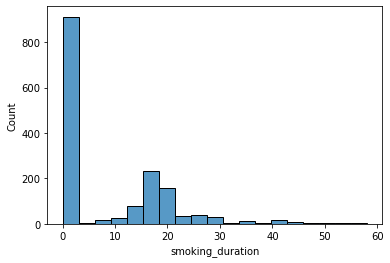

In [262]:
sns.histplot(df.smoking_duration)

In [263]:
df.smoking_duration = np.log(df['smoking_duration'] + 1)

### Колонка ciggaretes_per_day

In [264]:
df.ciggaretes_per_day.value_counts(dropna=False)

NaN      919
20.0     186
10.0     139
5.0       69
15.0      51
3.0       28
2.0       28
30.0      24
40.0      23
1.0       22
4.0       22
6.0       19
7.0       16
12.0      11
8.0       10
25.0       7
60.0       4
50.0       2
18.0       2
13.0       2
17.0       2
16.0       2
180.0      1
80.0       1
35.0       1
14.0       1
11.0       1
Name: ciggaretes_per_day, dtype: int64

In [265]:
df.ciggaretes_per_day.fillna(0, inplace=True)

In [266]:
df.ciggaretes_per_day = np.log(df['ciggaretes_per_day']+1)

<AxesSubplot:>

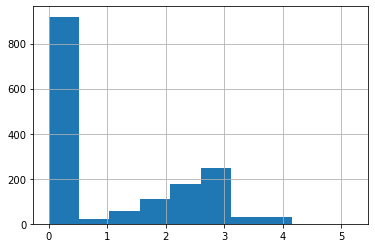

In [267]:
df.ciggaretes_per_day.hist()

### Колонка passive_smoking

In [268]:
df.passive_smoking.value_counts(dropna=False)

0    1215
1     378
Name: passive_smoking, dtype: int64

### Колонка passive_smoking_frequency

In [269]:
df.passive_smoking_frequency.value_counts(dropna=False)

NaN                       1216
1-2 раза в неделю          158
4 и более раз в день        75
2-3 раза в день             59
не менее 1 раза в день      47
3-6 раз в неделю            38
Name: passive_smoking_frequency, dtype: int64

In [270]:
df.passive_smoking_frequency.fillna(0, inplace=True)

In [271]:
#Словарь для замены текста на порядок:
passive_smoking_dict = {'1-2 раза в неделю':1, '3-6 раз в неделю':2, 'не менее 1 раза в день':3, '2-3 раза в день':4, '4 и более раз в день':5}

In [272]:
df.passive_smoking_frequency.replace(passive_smoking_dict, inplace=True)

### Колонка alcohol

In [273]:
df.alcohol.value_counts(dropna=False)

употребляю в настоящее время    1046
никогда не употреблял            300
ранее употреблял                 247
Name: alcohol, dtype: int64

In [274]:
alcohol = pd.get_dummies(df.alcohol)
print('Before replace: ', list(alcohol.columns))
alcohol.columns = ['never_drink_alco', 'previous_drink_alco', 'drink_alco_now']
print('After replace: ', list(alcohol.columns))

Before replace:  ['никогда не употреблял', 'ранее употреблял', 'употребляю в настоящее время']
After replace:  ['never_drink_alco', 'previous_drink_alco', 'drink_alco_now']


In [275]:
df = pd.concat([df, alcohol], axis=1)
df.drop('alcohol', axis=1, inplace=True)

### Колонка alcohol_duration

In [276]:
df.alcohol_duration.value_counts(dropna=False)

NaN     304
20.0    299
18.0    278
17.0    131
16.0    111
25.0     88
19.0     66
21.0     57
15.0     50
22.0     42
30.0     28
23.0     25
14.0     18
35.0     15
24.0     13
26.0      8
40.0      8
12.0      5
45.0      5
29.0      5
33.0      4
27.0      4
37.0      4
13.0      4
10.0      3
50.0      3
32.0      3
6.0       2
28.0      2
46.0      1
36.0      1
9.0       1
48.0      1
63.0      1
43.0      1
44.0      1
60.0      1
Name: alcohol_duration, dtype: int64

In [277]:
df.alcohol_duration.fillna(0, inplace=True)

In [278]:
df.alcohol_duration = np.log(df['alcohol_duration'] + 1)

### Колонка time_fall_asleep

In [279]:
df.time_fall_asleep = df.time_fall_asleep.apply(lambda x: dt.strptime(x, '%H:%M:%S'))

In [280]:
df.time_fall_asleep.value_counts()

1900-01-01 23:00:00    518
1900-01-01 00:00:00    343
1900-01-01 22:00:00    291
1900-01-01 01:00:00    113
1900-01-01 23:30:00     73
1900-01-01 21:00:00     63
1900-01-01 22:30:00     62
1900-01-01 02:00:00     34
1900-01-01 00:30:00     30
1900-01-01 21:30:00     22
1900-01-01 23:59:00      9
1900-01-01 01:30:00      7
1900-01-01 23:50:00      6
1900-01-01 03:00:00      4
1900-01-01 02:30:00      2
1900-01-01 20:00:00      2
1900-01-01 00:10:00      2
1900-01-01 01:20:00      1
1900-01-01 00:15:00      1
1900-01-01 12:00:00      1
1900-01-01 00:01:00      1
1900-01-01 20:30:00      1
1900-01-01 22:23:00      1
1900-01-01 21:50:00      1
1900-01-01 09:00:00      1
1900-01-01 00:05:00      1
1900-01-01 04:00:00      1
1900-01-01 00:00:30      1
1900-01-01 05:00:00      1
Name: time_fall_asleep, dtype: int64

### Статья о времени засыпания:
- https://doi.org/10.1093/ehjdh/ztab088

In [281]:
df['sleep_onset_early_22'] = np.where(df.time_fall_asleep.dt.time.between(time(20,0),time(21,59)), 1, 0)
df['sleep_onset_22'] = np.where(df.time_fall_asleep.dt.time.between(time(22,0),time(22,59)), 1, 0)
df['sleep_onset_23'] = np.where(df.time_fall_asleep.dt.time.between(time(23,0),time(23,59)), 1, 0)
df['sleep_onset_later_after_0'] = np.where(df.time_fall_asleep.dt.time.between(time(0,0),time(4,0)), 1, 0)

### Колонка time_awakening

In [282]:
df.time_awakening = df.time_awakening.apply(lambda x: dt.strptime(x, '%H:%M:%S')) 

In [283]:
df.time_awakening.value_counts()

1900-01-01 06:00:00    396
1900-01-01 07:00:00    374
1900-01-01 08:00:00    208
1900-01-01 06:30:00    116
1900-01-01 09:00:00    105
1900-01-01 05:30:00     79
1900-01-01 05:00:00     73
1900-01-01 07:30:00     64
1900-01-01 10:00:00     43
1900-01-01 08:30:00     24
1900-01-01 04:00:00     23
1900-01-01 04:30:00     13
1900-01-01 09:30:00     11
1900-01-01 11:00:00      7
1900-01-01 06:15:00      6
1900-01-01 06:20:00      5
1900-01-01 12:00:00      5
1900-01-01 03:00:00      4
1900-01-01 07:20:00      4
1900-01-01 00:00:00      3
1900-01-01 06:03:00      3
1900-01-01 06:50:00      3
1900-01-01 06:40:00      3
1900-01-01 05:50:00      3
1900-01-01 10:30:00      2
1900-01-01 06:10:00      2
1900-01-01 06:45:00      2
1900-01-01 07:15:00      2
1900-01-01 03:40:00      1
1900-01-01 05:15:00      1
1900-01-01 06:05:00      1
1900-01-01 05:20:00      1
1900-01-01 08:03:00      1
1900-01-01 07:08:00      1
1900-01-01 05:40:00      1
1900-01-01 03:30:00      1
1900-01-01 04:40:00      1
1

In [284]:
df['sleep_upset_early_6'] = np.where(df.time_awakening.dt.time.between(time(4,0),time(5,59)), 1, 0)
df['sleep_upset_6'] = np.where(df.time_awakening.dt.time.between(time(6,0),time(6,59)), 1, 0)
df['sleep_upset_7'] = np.where(df.time_awakening.dt.time.between(time(7,0),time(7,59)), 1, 0)
df['sleep_upset_8'] = np.where(df.time_awakening.dt.time.between(time(8,0),time(8,59)), 1, 0)
df['sleep_upset_after_9'] = np.where(df.time_awakening.dt.time.between(time(9,0),time(11,59)), 1, 0)

In [285]:
df['sleeptime'] = (df.time_awakening - df.time_fall_asleep).apply(lambda x: x.seconds//3600)

In [286]:
df.drop(['time_fall_asleep','time_awakening'], axis=1, inplace=True)

### Колонка midday_sleep

In [287]:
df.midday_sleep.value_counts(dropna=False)

0    1232
1     361
Name: midday_sleep, dtype: int64

### Колонка sport_clubs

In [288]:
df.sport_clubs.value_counts(dropna=False)

0    1491
1     102
Name: sport_clubs, dtype: int64

### Колонка religion_clubs

In [289]:
df.religion_clubs.value_counts(dropna=False)

0    1557
1      36
Name: religion_clubs, dtype: int64

## Подготовка данных

In [290]:
# Проверка на наличие пропусков в итоговом наборе данных
df.isna().sum().sum()

0

In [291]:
df

,sex,education,job,retired,stop_work_due_disease,diabetes,hepatitis,oncology,chronic_lung_disease,bronchial_asthma,tuberculosis,hiv/aids,intake_medicines,trauma_last_year,fractures,smoking_duration,ciggaretes_per_day,passive_smoking,passive_smoking_frequency,alcohol_duration,midday_sleep,sport_clubs,religion_clubs,train,married,divorced,widowed,cohabited,single,separated,asian,european,other,is_russian,atheist,muslim,no,christian,household,military,senior_specialist,farmer/fisherman,low_qualified_work,industry,top_management,service,crafters_other,office,junior_specialists,never_drink_alco,previous_drink_alco,drink_alco_now,sleep_onset_early_22,sleep_onset_22,sleep_onset_23,sleep_onset_later_after_0,sleep_upset_early_6,sleep_upset_6,sleep_upset_7,sleep_upset_8,sleep_upset_after_9,sleeptime
0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2.772589,3.044522,0,0,2.944439,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,8
1,0,4,0,0,0,1,0,0,0,0,0,0,1,0,1,0.000000,0.000000,0,0,0.000000,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,4
2,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.000000,1,1,2.890372,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,8
3,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,2.564949,2.397895,1,2,2.639057,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,8
4,0,2,0,0,1,1,1,0,0,0,0,0,1,0,1,0.000000,0.000000,1,3,2.833213,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0,4,1,0,0,1,0,0,0,0,0,0,1,1,1,0.000000,0.000000,0,0,3.433987,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,7
1589,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.000000,0,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9
1590,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.000000,1,3,3.258097,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,9
1591,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,4,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,8


In [292]:
num_cols = ['education', 'smoking_duration', 'ciggaretes_per_day',
            'passive_smoking_frequency', 'alcohol_duration', 'sleeptime']

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
scaler = StandardScaler()


In [295]:
for col in num_cols:
    df[col] = StandardScaler().fit_transform(
    df[col].values.reshape(-1, 1))

In [296]:
df

,sex,education,job,retired,stop_work_due_disease,diabetes,hepatitis,oncology,chronic_lung_disease,bronchial_asthma,tuberculosis,hiv/aids,intake_medicines,trauma_last_year,fractures,smoking_duration,ciggaretes_per_day,passive_smoking,passive_smoking_frequency,alcohol_duration,midday_sleep,sport_clubs,religion_clubs,train,married,divorced,widowed,cohabited,single,separated,asian,european,other,is_russian,atheist,muslim,no,christian,household,military,senior_specialist,farmer/fisherman,low_qualified_work,industry,top_management,service,crafters_other,office,junior_specialists,never_drink_alco,previous_drink_alco,drink_alco_now,sleep_onset_early_22,sleep_onset_22,sleep_onset_23,sleep_onset_later_after_0,sleep_upset_early_6,sleep_upset_6,sleep_upset_7,sleep_upset_8,sleep_upset_after_9,sleeptime
0,1,-1.603579,1,0,0,0,0,0,0,0,0,0,0,0,0,0.993849,1.528732,0,-0.455480,0.412302,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0.283724
1,0,1.171545,0,0,0,1,0,0,0,0,0,0,1,0,1,-0.854790,-0.796418,0,-0.455480,-2.034425,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-2.284305
2,0,1.171545,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.854790,-0.796418,1,0.280402,0.367374,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.283724
3,1,-1.603579,1,0,0,0,0,1,0,0,0,0,1,0,0,0.855404,1.034893,1,1.016284,0.158540,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.283724
4,0,-1.603579,0,0,1,1,1,0,0,0,0,0,1,0,1,-0.854790,-0.796418,1,1.752166,0.319877,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,-0.358283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0,1.171545,1,0,0,1,0,0,0,0,0,0,1,1,1,-0.854790,-0.796418,0,-0.455480,0.819099,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,-0.358283
1589,0,1.171545,0,1,0,0,0,0,0,0,0,0,1,0,0,-0.854790,-0.796418,0,-0.455480,-2.034425,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.925732
1590,0,-0.216017,1,0,0,0,0,0,0,0,0,0,1,0,0,-0.854790,-0.796418,1,1.752166,0.672940,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0.925732
1591,0,-0.216017,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.854790,-0.796418,1,2.488048,-2.034425,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.283724


In [297]:
train = df[df['train'] == 1].drop('train', axis = 1)

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score

clf = LogisticRegression()

In [328]:
X = train.values
recalls = []
f1_scores = []
for i in range(5):
    y = target_train.values[:,i]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20) # random_state=42
    #X_over, y_over = oversam.fit_resample(X_train, y_train)
    #clf.fit(X_over, y_over)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    recalls.append(recall_score(y_valid, y_pred, average='macro'))
    f1_scores.append(f1_score(y_valid, y_pred))

In [329]:
np.mean(recalls)

0.5465977473674671

In [330]:
f1_scores

[0.6590909090909092, 0.0, 0.13793103448275862, 0.08333333333333333, 0.0]

In [102]:
determinant = np.prod(np.linalg.eig(alpha_corr)[0])
print(f'Детерминант корреляционной матрицы равен: {determinant}')

Детерминант корреляционной матрицы равен: 1.0805483537041116e-55


In [103]:
alpha_corr

,sex,education,job,retired,stop_work_due_disease,diabetes,hepatitis,oncology,chronic_lung_disease,bronchial_asthma,tuberculosis,hiv/aids,intake_medicines,trauma_last_year,fractures,smoking_duration,passive_smoking,alcohol_duration,midday_sleep,sport_clubs,religion_clubs,married,divorced,widowed,cohabited,single,separated,asian,other,is_russian,atheist,muslim,no,christian,household,military,senior_specialist,farmer/fisherman,low_qualified_work,industry,top_management,service,crafters_other,office,junior_specialists,previous_drink_alco,drink_alco_now,sleep_onset_early_22,sleep_onset_22,sleep_onset_23,sleep_onset_later_after_0,sleep_upset_early_6,sleep_upset_6,sleep_upset_7,sleep_upset_8,sleep_upset_after_9,sleeptime,arterial_hypertension,ACD,IHD,heart_failure,other_cardio_diseases
sex,1.000000,-0.101709,0.181715,-0.160482,0.012543,-0.047180,-0.003931,-0.054216,0.003134,-0.059957,0.015783,0.019931,-0.183618,-0.023634,0.130975,0.377711,0.025240,0.142071,0.065984,-0.013911,-0.024533,0.286947,-0.139257,-0.249467,0.035309,-0.065230,-0.030028,0.119025,-0.002776,-0.108588,0.104955,0.069855,0.097781,-0.166641,-0.051991,0.015740,-0.148631,0.032663,0.061889,0.193439,0.115247,-0.067938,0.206256,-0.070722,-0.140489,0.087221,0.074785,-0.039181,-0.012241,0.095141,-0.070852,0.028573,0.032659,0.020258,-0.085402,0.002563,-0.020289,-0.119174,0.075247,0.005842,-0.082410,-0.086526
education,-0.101709,1.000000,0.141569,-0.120333,-0.085095,-0.095664,-0.014166,-0.009097,-0.064727,-0.113857,-0.034824,-0.070613,-0.008593,0.030019,-0.080400,-0.084719,-0.026029,0.015187,-0.108812,0.159528,-0.016454,0.024634,0.070510,-0.099317,-0.056120,0.067108,0.023658,-0.066276,-0.065089,0.072878,0.026968,-0.073105,-0.050075,0.038025,-0.067072,0.047419,0.542282,-0.033684,-0.310723,-0.146340,0.142777,-0.108061,-0.128465,-0.025176,-0.030514,-0.055472,0.065877,-0.009717,-0.075227,0.000803,0.069313,-0.093231,0.023890,0.030562,-0.006994,0.020450,0.002075,-0.106846,-0.064249,-0.050195,-0.080554,0.016931
job,0.181715,0.141569,1.000000,-0.744162,-0.235818,-0.135528,0.017977,-0.126516,0.002411,-0.056535,-0.036183,-0.048023,-0.207699,0.002783,-0.056837,0.077862,0.058003,0.061919,-0.145778,0.024712,-0.021219,0.052148,0.059395,-0.216635,0.088584,0.035255,-0.002161,0.049145,0.008236,-0.014997,0.029105,0.005821,0.005524,-0.028401,-0.281503,-0.046999,0.055327,-0.030134,0.117761,0.073879,0.107958,0.028804,-0.098061,0.020664,-0.021831,-0.111584,0.146742,-0.006856,0.059142,0.006358,-0.056449,0.109295,0.133705,-0.003268,-0.198186,-0.063828,-0.106568,-0.224856,-0.077221,-0.206260,-0.176134,-0.058784
retired,-0.160482,-0.120333,-0.744162,1.000000,-0.066448,0.174259,-0.051355,0.113311,-0.001056,0.057585,-0.026362,-0.032520,0.218822,-0.000878,0.073037,-0.125847,-0.031715,-0.046497,0.109357,0.019553,0.009290,-0.075082,-0.025552,0.236775,-0.100435,-0.057860,0.016006,-0.078791,-0.008987,0.073312,-0.021829,-0.057286,-0.019023,0.052271,0.197934,0.040718,-0.028190,0.021872,-0.083542,-0.034665,-0.103042,-0.080893,0.100563,-0.001193,0.025573,0.022369,-0.072508,0.041091,-0.034249,-0.033373,0.045437,-0.081484,-0.090543,0.019240,0.164142,-0.001279,0.079999,0.255916,0.057585,0.221894,0.175824,0.032419
stop_work_due_disease,0.012543,-0.085095,-0.235818,-0.066448,1.000000,0.018050,0.021950,0.069072,0.009853,0.000606,0.035404,0.096669,0.085992,-0.009930,0.007357,-0.013868,0.025512,-0.042675,0.065412,-0.041376,0.063250,-0.040942,-0.000304,0.042652,0.003458,0.021904,-0.010305,-0.030284,0.095332,-0.027114,-0.019517,0.057613,0.072983,-0.049952,0.019280,-0.016320,-0.055748,-0.030284,0.032726,-0.008670,-0.043877,0.015700,0.028818,-0.022347,0.055544,0.099026,-0.098744,-0.011810,0.000348,0.005679,0.000086,-0.036988,-0.023564,0.003634,0.062542,0.001376,0.032995,0.044279,0.097109,0.080011,0.054904,0.031735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [331]:
target_cols = ['arterial_hypertension', 'ACD',
               'IHD', 'heart_failure', 'other_cardio_diseases']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
